## Exercise 2.1
The probability to choose a greedy action is `1-eps` = `1-0.5` = `0.5`
There are only two options to chose from, so probability to choose greedy one is `0.5 * 0.5 = 0.25`
And result is `0.5 + 0.25 = 0.75`

## Exercise 2.2

1. t1: 0, 0, 0, 0
2. t2: 1, 0, 0, 0
3. t3: 1, 1, 0, 0
4. t4: 1, 1.5, 0, 0
5. t5: 1, 1.67, 0, 0
----------------------------

1. Possibly. Q(Ak)=0 for all k if choose A1
2. Will occur. Q(a1)>0
3. Possibly. Q(Ak)=1 if k in[1,2]
4. Maybe: Q(A2) = 1.5
5. Yes: Q(A2) = 1.67

In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
class EpsilonBandit:

    def __init__(self, steps_count, epsilon, k=10, means=None):
        self.steps_count = steps_count
        self.epsilon = epsilon
        self.k = k
        self.means = np.random.normal(0, 1, k) if means is None else means
        self.rewards = np.zeros(steps_count)
        self.mean_reward_by_arm = np.zeros(k)
        self.steps_count_by_arm = np.zeros(k)

    def _get_reward(self, step):
        probability = np.random.rand()
        if self.epsilon == 0 and step == 0:
            a = np.random.choice(self.k)
        elif probability < self.epsilon:
            a = np.random.choice(self.k)  # selecting action
        else:
            a = np.argmax(self.mean_reward_by_arm)  # greedy action
        reward = np.random.normal(self.means[a], 1)
        return reward, a

    def run(self):
        mean_reward = 0
        for i in range(0, self.steps_count):
            reward, a = self._get_reward(step=i)

            mean_reward = mean_reward + (reward - mean_reward) / (i+1)
            self.steps_count_by_arm[a] = self.mean_reward_by_arm[a] + (reward - self.mean_reward_by_arm[a]) / self.steps_count_by_arm[a]

            self.steps_count_by_arm[a] += 1

            self.rewards[i] = mean_reward
        return self.rewards

In [27]:
k = 10
means = np.random.normal(0, 1, k)

In [61]:
x = [1/256, 1/128, 1/64, 1/32, 1/16, 1/8, 1/4, 1/2]
x_ticks = ['1/256', '1/128', '1/64', '1/32', '1/16', '1/8', '1/4', '1/2']
y = []
for epsilon in x:
    bandit = EpsilonBandit(1000, epsilon, k, means)
    rewards = bandit.run()
    y.append(np.mean(rewards))

C:\Users\Olexandr\AppData\Local\Temp/ipykernel_7712/1495405466.py:29: RuntimeWarning: divide by zero encountered in double_scalars
  self.steps_count_by_arm[a] = self.mean_reward_by_arm[a] + (reward - self.mean_reward_by_arm[a]) / self.steps_count_by_arm[a]


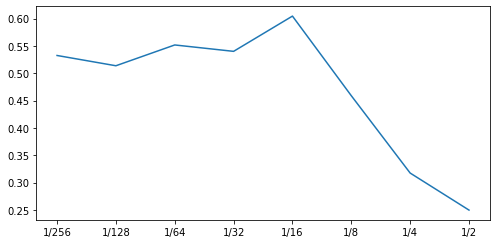

In [63]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
default_x_ticks = range(len(x))
plt.plot(default_x_ticks, y)
plt.xticks(default_x_ticks, x_ticks)
plt.show()